In [1]:
!pip install numpy==1.23.5
!pip install seaborn==0.9.0
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_renomear = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido",
}

dados = dados.rename(columns = a_renomear)

In [5]:
troca = {
    'yes' : 1,
    'no' : 0
}

dados.vendido = dados.vendido.map(troca)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [7]:
dados['km_por_ano'] = (dados.milhas_por_ano * (1.60934))
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [8]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [9]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(5)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("Acurácia de: %.2f%%" % acuracia)

Acurácia de: 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(treino_x, treino_y)

acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("Acurácia de dummy stratified: %.2f%%" % acuracia)

Acurácia de dummy stratified: 52.44%


In [12]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)

acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("Acurácia de dummy mostfrequent: %.2f%%" % acuracia)

Acurácia de dummy mostfrequent: 58.00%


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(5)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.25, random_state=5, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#treinando um escalador baseado na escala do treino_x
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma="auto")
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("Acurácia de: %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia de: 77.48%


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.25, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#treinando um escalador baseado na escala do treino_x
# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(raw_treino_x, treino_y)

previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("Acurácia de: %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia de: 79.32%


In [41]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names = ["nao", "sim"]
                           )

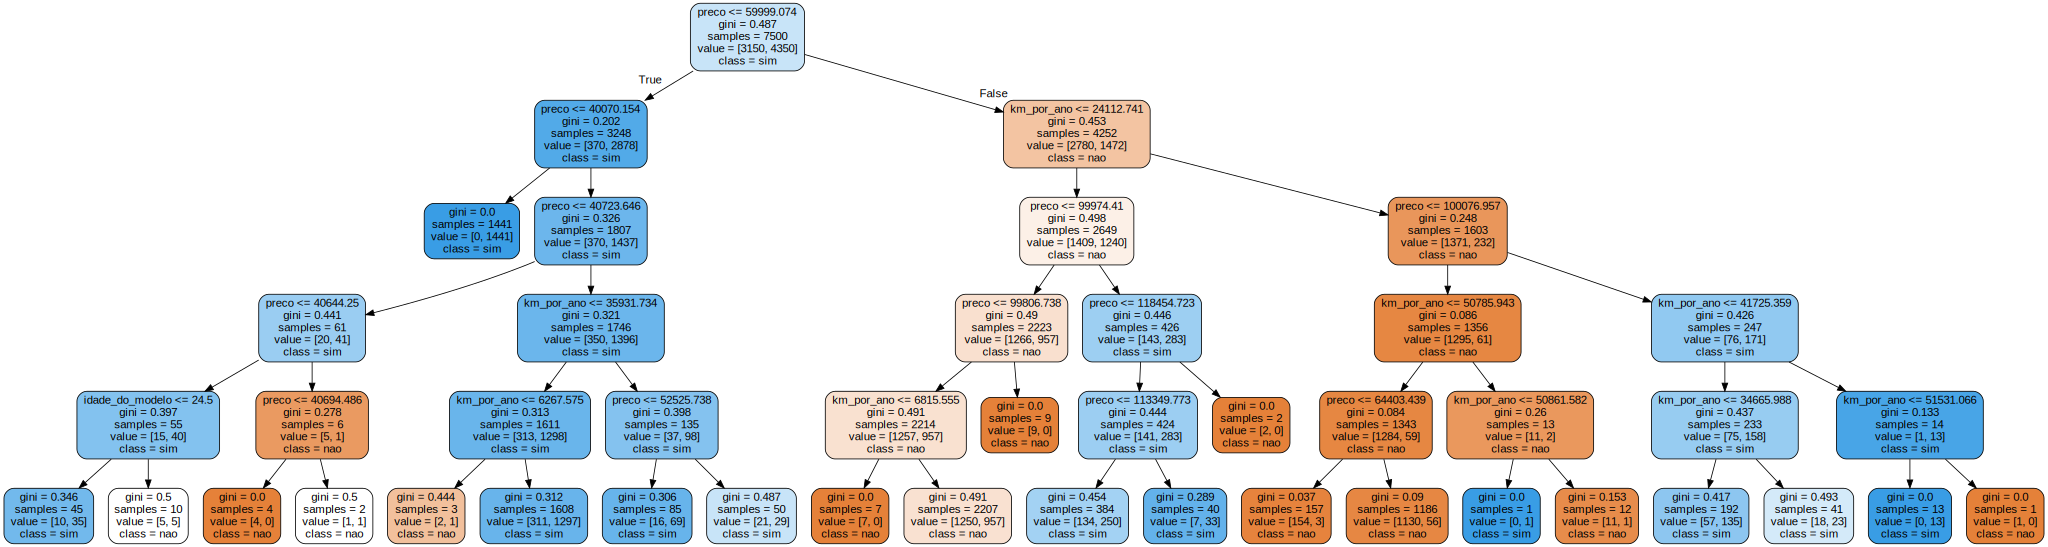

In [42]:
import graphviz
grafico = graphviz.Source(dot_data)
grafico